1. Archive Exploration
These data describes hurricanes across Yucatan Peninsula, including data on hurricane category, track, name, and duration.

Boose, E. and D. Foster. 2023. Ecological Impacts of Hurricanes Across the Yucatan Peninsula 1851-2000 ver 23. Environmental Data Initiative. https://doi.org/10.6073/pasta/f219113373913f2daf421732e28d3c38 (Accessed 2025-10-24).


In [1]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Read in data
df = pd.read_csv("data/hf071-01-hurricanes.csv")

# Look at first few rows
df.head()

,code,start.date,end.date,number,name,ss,track,rf.max
0,Y1852,1852-10-07,1852-10-08,5,NaN,2,O,F1
1,Y1857,1857-09-28,1857-09-28,4,NaN,2,N,F1
2,Y1861,1861-08-17,1861-08-17,2,NaN,1,O,Nd
3,Y1864,1864-08-31,1864-08-31,3,NaN,1,S,F1
4,Y1865,1865-09-11,1865-09-11,4,NaN,2,O,F1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   code        105 non-null    object
 1   start.date  105 non-null    object
 2   end.date    105 non-null    object
 3   number      105 non-null    int64 
 4   name        33 non-null     object
 5   ss          105 non-null    int64 
 6   track       105 non-null    object
 7   rf.max      105 non-null    object
dtypes: int64(2), object(6)
memory usage: 6.7+ KB


# 3. Brainstorm

### In this session we want to answer the following question:

How many hurricanes with Saffir-Simpson category 5 have been registered and what was their duration?

- step 1: filter for category 5 and get a total count
- step 2: change date columns to datetime
- step 3: subtract dates for duration, new column


# 4. Data wrangling

In [33]:
# 1. filter for cat 5 hurricanes
df_5 = df[df['ss'] == 5]
df_5

,code,start.date,end.date,number,name,ss,track,rf.max
76,Y1955b,1955-09-28 00:00:00,1955-09-28 00:00:00,10,Janet,5,N,F3
96,Y1980a,1980-08-07 00:00:00,1980-08-08 00:00:00,1,Allen,5,O,F3
98,Y1988,1988-09-14 00:00:00,1988-09-15 00:00:00,8,Gilbert,5,N,F3
103,Y1998,1998-10-27 00:00:00,1998-10-28 00:00:00,13,Mitch,5,S,F1


In [34]:
df_5['ss'].count()

4

In [35]:
df_5.loc[:,'start.date'] = pd.to_datetime(df_5['start.date'])
df_5.loc[:,'end.date'] = pd.to_datetime(df_5['end.date'])

In [36]:
df_5.dtypes

code          object
start.date    object
end.date      object
number         int64
name          object
ss             int64
track         object
rf.max        object
dtype: object

In [37]:
df_5.loc[:,'duration'] = df_5['end.date'] - df_5['start.date']

/tmp/ipykernel_3288488/113695967.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_5.loc[:,'duration'] = df_5['end.date'] - df_5['start.date']


In [38]:
df_5

,code,start.date,end.date,number,name,ss,track,rf.max,duration
76,Y1955b,1955-09-28 00:00:00,1955-09-28 00:00:00,10,Janet,5,N,F3,0 days 00:00:00
96,Y1980a,1980-08-07 00:00:00,1980-08-08 00:00:00,1,Allen,5,O,F3,1 days 00:00:00
98,Y1988,1988-09-14 00:00:00,1988-09-15 00:00:00,8,Gilbert,5,N,F3,1 days 00:00:00
103,Y1998,1998-10-27 00:00:00,1998-10-28 00:00:00,13,Mitch,5,S,F1,1 days 00:00:00


<Axes: xlabel='start.date', ylabel='ss'>

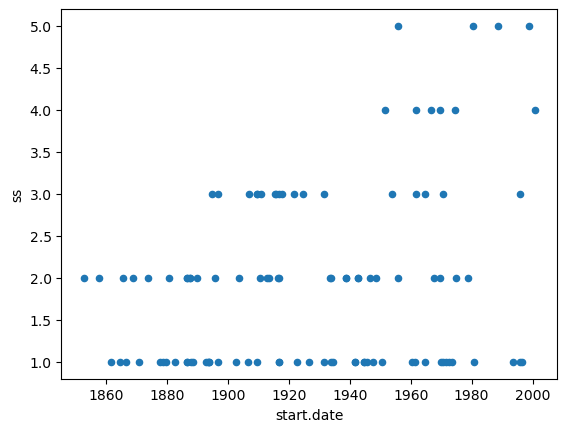

In [40]:
df.plot(kind = 'scatter',
       x = 'start.date',
       y = 'ss')

Text(0.5, 1.0, 'Hurricane frequency over time in Yucatan Peninsula')

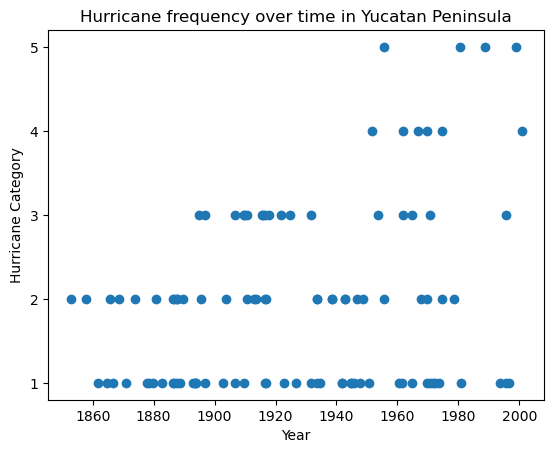

In [44]:
df.loc[:,'start.date'] = pd.to_datetime(df['start.date'])
df.loc[:,'end.date'] = pd.to_datetime(df['end.date'])

plt.scatter('start.date', 'ss', data = df)

plt.yticks([1, 2, 3, 4, 5])
plt.xlabel("Year")
plt.ylabel("Hurricane Category")
plt.title("Hurricane frequency over time in Yucatan Peninsula")

The intensity of hurricanes has increased in frequency since the 1950s, with frequency of hurricanes at category 1, 2, and 3 staying around the same. Overall hurricane frequency has increased over time since the 1950s.

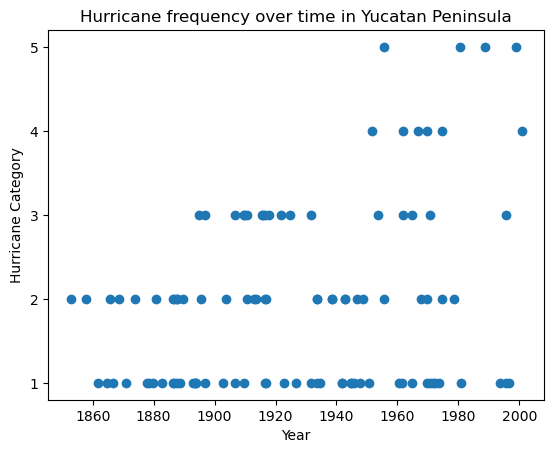

In [54]:
# condensed code!

# Import packages
import pandas as pd
import matplotlib.pyplot as plt

# Read in data
df = pd.read_csv("data/hf071-01-hurricanes.csv")

# Change data types to date time from object
df.loc[:,'start.date'] = pd.to_datetime(df['start.date'])
df.loc[:,'end.date'] = pd.to_datetime(df['end.date'])

# Plot in a scatter plot
plt.scatter('start.date', 'ss', data = df)

plt.yticks([1, 2, 3, 4, 5])
plt.xlabel("Year")
plt.ylabel("Hurricane Category")
plt.title("Hurricane frequency over time in Yucatan Peninsula")

plt.show()